Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:13<00:00, 1526.23draws/s]


0.7125

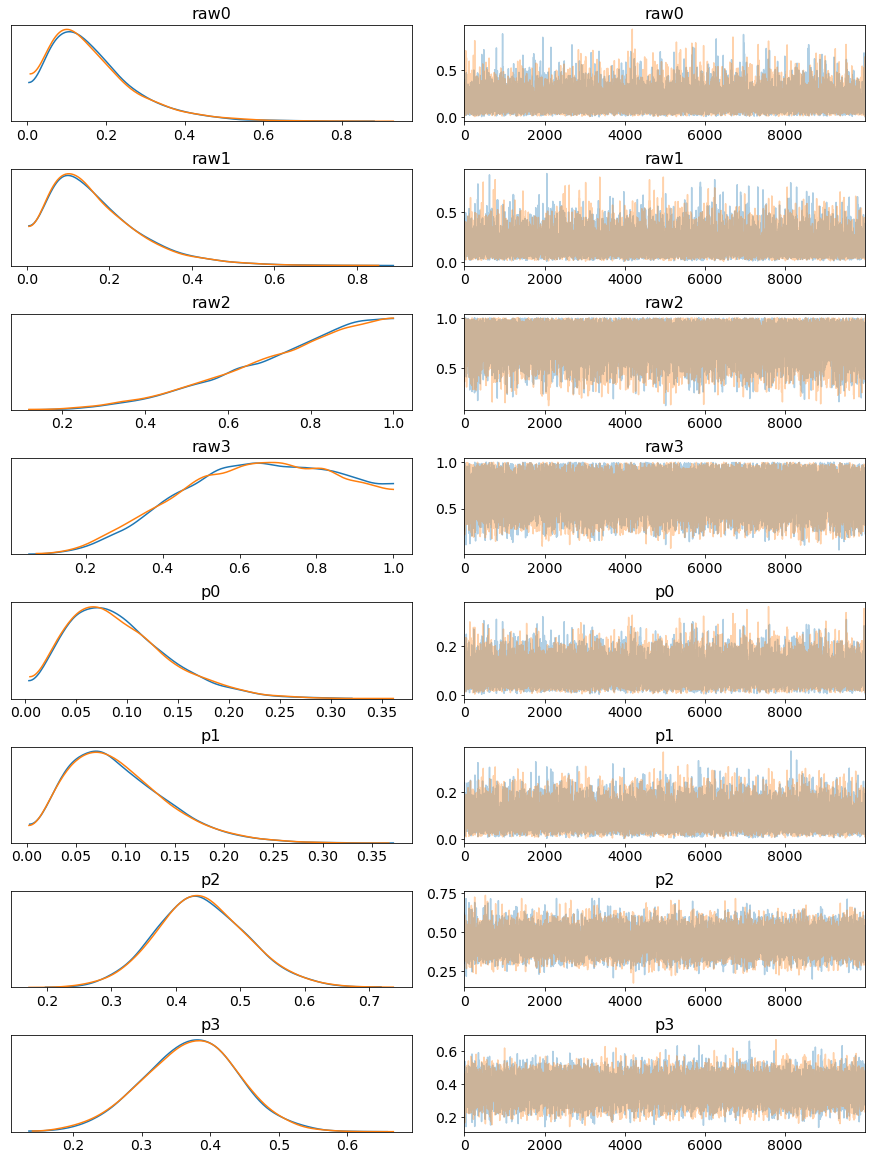

In [1]:
import pymc3 as pm
%matplotlib inline

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

def uniform_prior(k):
    rs = [pm.Uniform('raw%s' % i, 0, 1) for i in range(k)]
    s = sum(rs)
    return [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(uniform_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [2]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.168892,0.111474,0.000958,0.011938,0.389005,13424.173798,0.999998
raw1,0.169911,0.111838,0.001064,0.012157,0.391471,13362.315109,1.000040
raw2,0.769169,0.170587,0.001783,0.440761,0.999982,9670.738913,1.000196
raw3,0.659403,0.197097,0.001888,0.322091,0.999858,10059.726059,1.000253
p0,0.092964,0.050012,0.000409,0.012169,0.192220,16755.892105,0.999951
p1,0.093514,0.050201,0.000438,0.013129,0.192914,17042.980943,0.999950
p2,0.441658,0.071009,0.000546,0.306637,0.587381,16572.246526,0.999978
p3,0.371864,0.068727,0.000461,0.234797,0.505669,20018.065109,0.999975


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:18<00:00, 1144.81draws/s]
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.688257332758166, but should be close to 0.8. Try to increase the number of tuning steps.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


0.98635

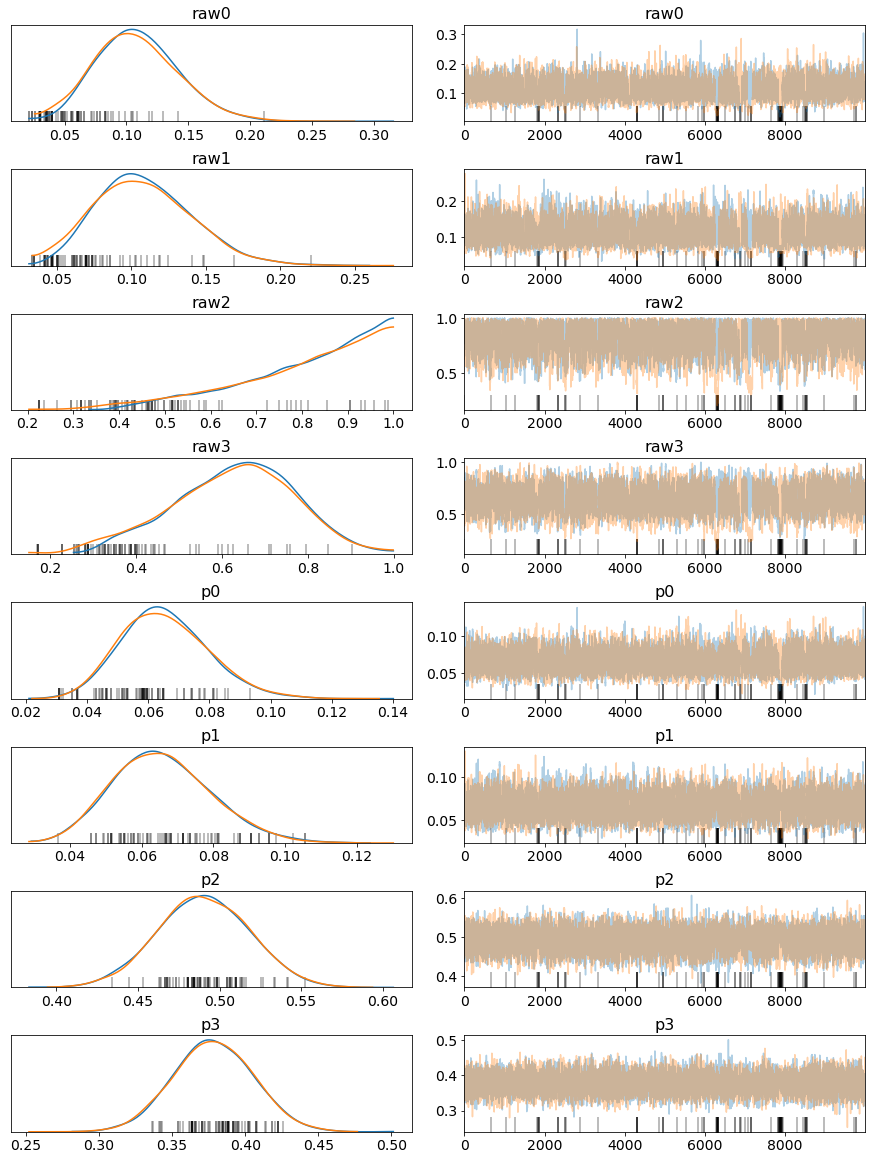

In [3]:
data = {
    'Carriage':  20,
    'Talabat':   20,
    'UberEats':  160,
    'Deliveroo': 120,
}
pm, trace = run_model(uniform_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [4]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.108759,0.033277,0.000922,0.045739,0.174332,1321.756358,1.000861
raw1,0.108976,0.032274,0.000810,0.046483,0.169187,1621.702147,1.001127
raw2,0.808033,0.152565,0.005275,0.504067,0.999950,813.116357,1.002423
raw3,0.627382,0.141411,0.004472,0.326597,0.876068,948.908646,1.001837
p0,0.065525,0.014088,0.000216,0.039311,0.093608,5870.505217,0.999953
p1,0.065861,0.013645,0.000151,0.039916,0.092449,8894.530591,0.999977
p2,0.490307,0.027630,0.000338,0.435812,0.543494,7653.508525,1.000003
p3,0.378307,0.026823,0.000271,0.328181,0.432392,10659.246368,0.999965


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:13<00:00, 1535.58draws/s]


0.8986

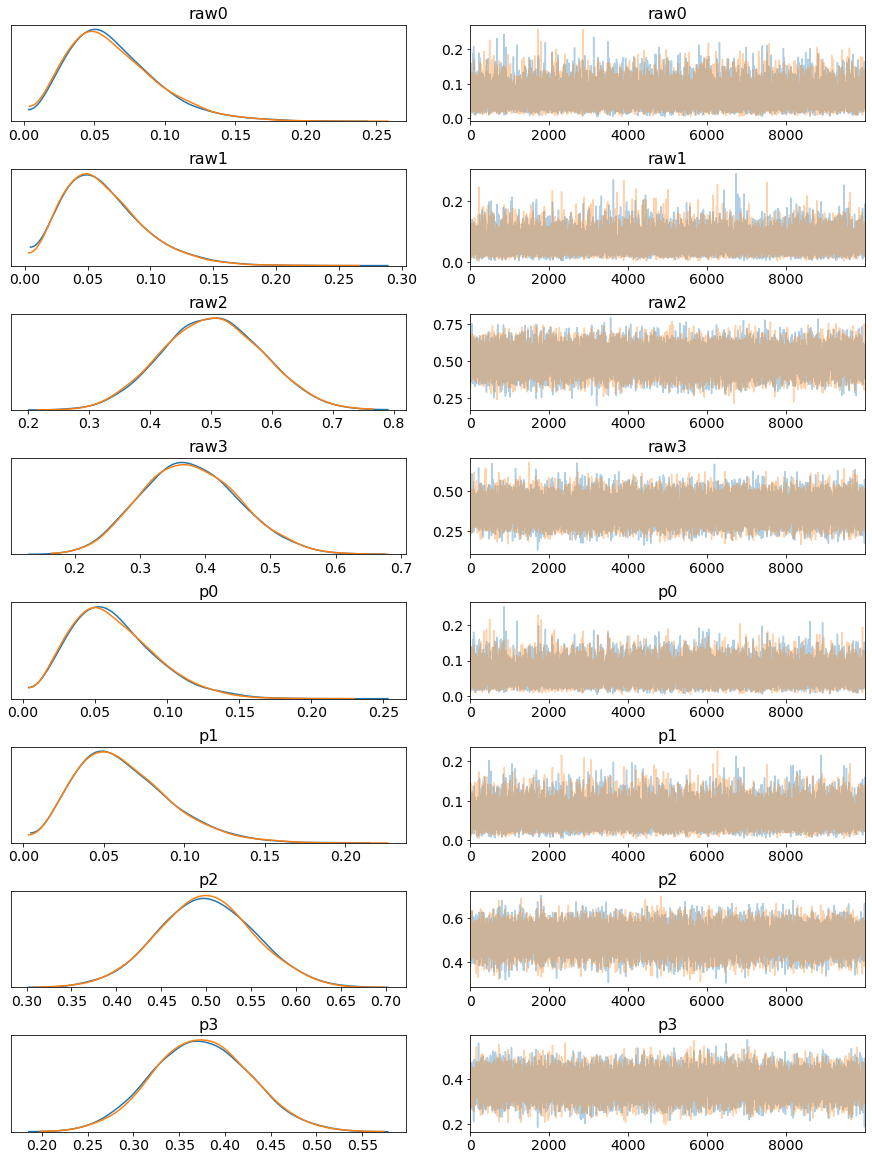

In [5]:
data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

# BAKING OBSERVATIONS INTO THE PRIOR IS A MODELLING MISTAKE, DON'T DO THIS
def beta_prior(vals, k):
    rs = [pm.Beta('raw%s' % i, vals[i], sum(vals)-vals[i]) for i in range(k)]
    s = sum(rs)
    return [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(vals, k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(beta_prior, data)
pm.traceplot(trace)
hypothesis = [trace['p2'][i] == max([trace['p%s' % j][i] for j in range(len(list(data.values())))]) for i in range(len(trace['p0']))]
sum(hypothesis) / len(hypothesis)

In [6]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.063825,0.031770,0.000203,0.012753,0.127689,26577.133405,0.999968
raw1,0.063464,0.031954,0.000205,0.012532,0.127730,21788.394370,0.999953
raw2,0.503521,0.080757,0.000647,0.346379,0.658335,15639.048499,0.999972
raw3,0.378108,0.073836,0.000555,0.242839,0.527907,21786.310001,1.000022
p0,0.062952,0.029196,0.000169,0.013726,0.121558,28654.571293,0.999993
p1,0.062519,0.029104,0.000170,0.014002,0.120339,24340.972886,0.999958
p2,0.499897,0.053479,0.000301,0.393325,0.603551,29011.579018,1.000000
p3,0.374632,0.052671,0.000351,0.271041,0.477322,29069.930074,1.000103


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ps]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:10<00:00, 1977.84draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f86afd0>,
      dtype=object)

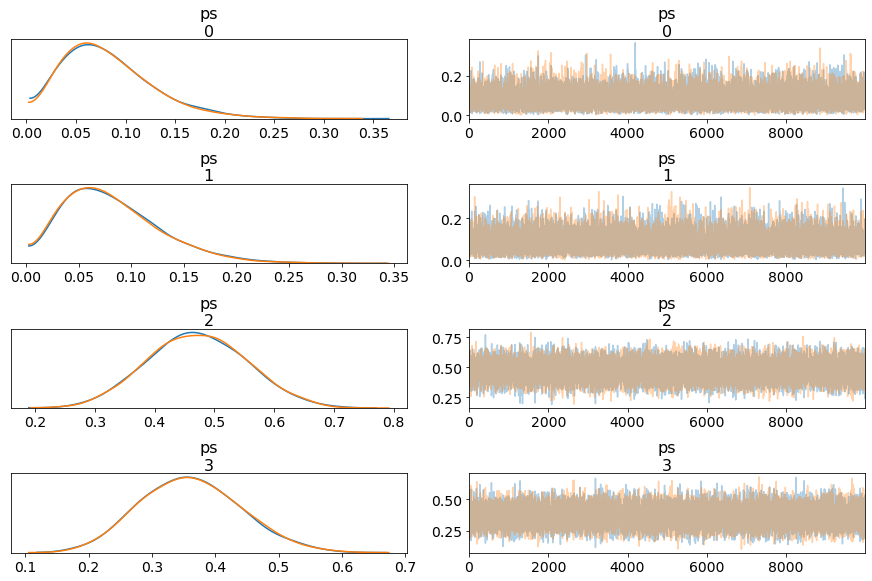

In [7]:
import numpy as np

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

def dirichlet_uniform_prior(k):
    return pm.Dirichlet('ps', a=1*np.ones(k))

def run_model(prior, data):
    with pm.Model() as model:
        vals = list(data.values())
        k = len(vals)
        ps = prior(k)
        multi = pm.Multinomial('multi', n=sum(vals), p=ps, observed=vals)
        trace = pm.sample(draws=10*1000, progressbar=True)
        return pm, trace

pm, trace = run_model(dirichlet_uniform_prior, data)
pm.traceplot(trace)

In [8]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
ps__0,0.083124,0.045221,0.000257,0.008787,0.171446,24536.419159,0.999961
ps__1,0.083417,0.045715,0.000300,0.011063,0.173406,24210.858511,1.000094
ps__2,0.471694,0.082152,0.000526,0.313792,0.633764,24760.613990,0.999958
ps__3,0.361766,0.079351,0.000490,0.211213,0.519224,26225.484228,0.999985


In [9]:
hypothesis = [ps[2] == max(ps) for ps in trace['ps']]
sum(hypothesis) / len(hypothesis)

0.76715

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ps]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:09<00:00, 2177.96draws/s]


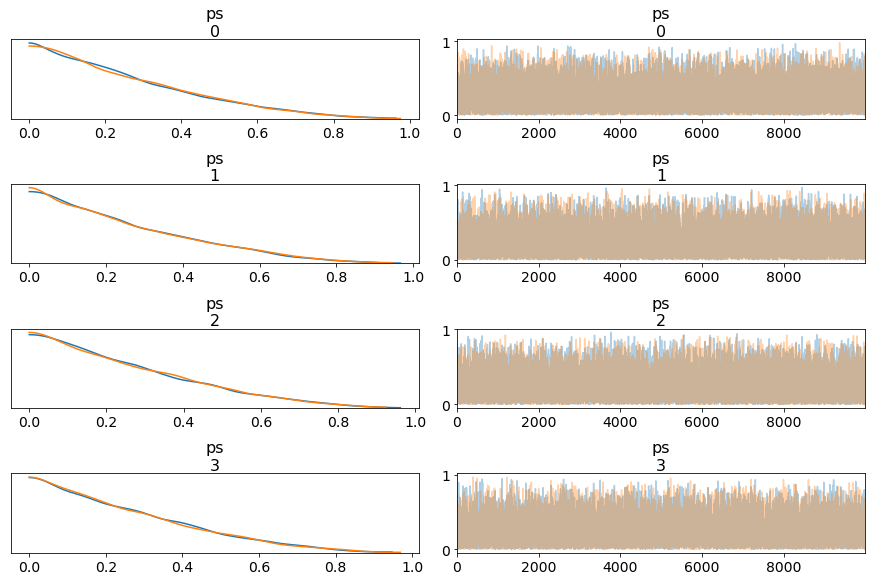

In [10]:
with pm.Model() as model:
    k = 4
    pm.Dirichlet('ps', a=1*np.ones(k))
    trace = pm.sample(draws=10*1000, progressbar=True)
    pm.traceplot(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [raw3, raw2, raw1, raw0]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:12<00:00, 1730.80draws/s]


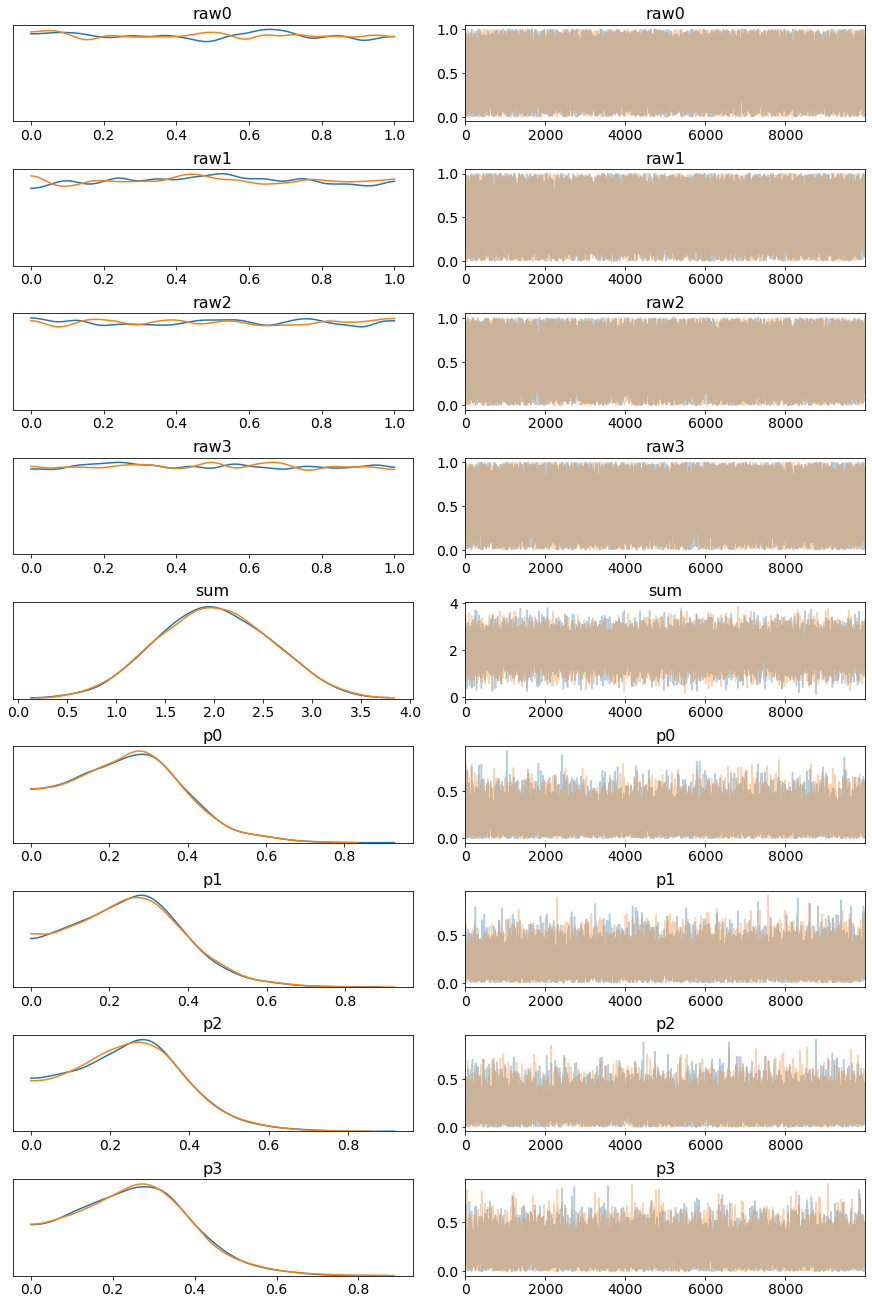

In [12]:
with pm.Model() as model:
    k = 4
    rs = [pm.Uniform('raw%s' % i, 0, 1) for i in range(k)]
    s = pm.Deterministic('sum', sum(rs))
    [pm.Deterministic('p%s' % i, rs[i]/s) for i in range(k)]
    trace = pm.sample(draws=10*1000, progressbar=True)
    pm.traceplot(trace)

In [13]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
raw0,0.497980,0.289021,0.001968,0.001385,0.949518,18689.385846,0.999956
raw1,0.500449,0.285951,0.001813,0.001620,0.949986,20385.958421,0.999953
raw2,0.500102,0.289126,0.001787,0.034999,0.985498,21925.646185,0.999961
raw3,0.499412,0.287670,0.001822,0.021823,0.968909,24784.168656,0.999950
sum,1.997943,0.580014,0.003862,0.901084,3.134196,21911.091928,0.999965
p0,0.249117,0.140157,0.000997,0.000049,0.483754,17577.676735,0.999952
p1,0.251131,0.139156,0.000971,0.000101,0.487487,18518.756001,0.999951
p2,0.249585,0.138682,0.000897,0.000010,0.483658,20020.276483,0.999950
p3,0.250167,0.139168,0.000810,0.000093,0.485972,21583.554614,0.999954
